### Automation Script Overhaul 
For automating the parsing, transformation, and geographic file creation from .GPX
Work taken from the script by Isias (ler_gpx.py) and workflow by Simone. Further developments by Kyle & Isais. <br><br>
Data collection must be done with Locus Map 4.x or formatted similarly to GPX files exportd by the map for this script to work.

### Section 1
This section takes the raw GPX files and makes them ready for QGIS and statistical analysis.

In [3]:
#import dependiencies
import gpxpy
import pandas as pd
import geopandas as gpd
from glob import glob

# see all GPX files from a saved directory
gpxFiles = glob('GPX_Exports/*.gpx')
print(gpxFiles)

['GPX_Exports/20220607_Kyle.gpx']


##### Choose the cell below for single file manipulation OR the cell two below for mass import and manipulation.

In [6]:
# Choose which file to use, select (using 0-n) the gpx file to manipulate
gpxCurrent = gpxFiles[0]
gpxCurrent = open(gpxCurrent)
gpxCurrent = gpxpy.parse(gpxCurrent)
gpxCurrent = gpxCurrent.to_xml()

# Read the XML into a dataframe, remove unecessary columns, and 
df = pd.read_xml(gpxCurrent)
df.pop('desc')
df.pop('hdop')
df.pop('time')
df = df.drop(index=0)
shiftPos = df.pop('name')
df.insert(0, 'name', shiftPos)
df.head()

,name,lat,lon,ele
1,2022-06-07 13:46:24j22,-7.517397,-34.967164,89.0
2,2022-06-07 13:49:07m4,-7.517351,-34.967194,89.0
3,2022-06-07 13:50:24j13,-7.517413,-34.967114,89.0
4,2022-06-07 13:53:31m4,-7.517787,-34.967158,84.0
5,2022-06-07 13:54:10m4,-7.517740,-34.967198,84.0


In [ ]:
# Merge all GPX files in directory


In [7]:
# Convert to geodataframe for geographic use
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat, df.ele))

gdf.head()

,name,lat,lon,ele,geometry
1,2022-06-07 13:46:24j22,-7.517397,-34.967164,89.0,POINT Z (-34.96716 -7.51740 89.00000)
2,2022-06-07 13:49:07m4,-7.517351,-34.967194,89.0,POINT Z (-34.96719 -7.51735 89.00000)
3,2022-06-07 13:50:24j13,-7.517413,-34.967114,89.0,POINT Z (-34.96711 -7.51741 89.00000)
4,2022-06-07 13:53:31m4,-7.517787,-34.967158,84.0,POINT Z (-34.96716 -7.51779 84.00000)
5,2022-06-07 13:54:10m4,-7.517740,-34.967198,84.0,POINT Z (-34.96720 -7.51774 84.00000)


In [ ]:
# Ask for observer, group, climate conditions


In [ ]:
# Split 'name' into Time, Age/Sex, Strata Position, and Behaviour


In [ ]:
# Attempt to detect each scan, else create column for scan number


In [8]:
gdf = gdf.set_crs('EPSG:4326')
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
gdf.to_file('gdf.gpkg', driver="GPKG")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 66 entries, 1 to 66
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      66 non-null     object  
 1   lat       66 non-null     float64 
 2   lon       66 non-null     float64 
 3   ele       66 non-null     float64 
 4   geometry  66 non-null     geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 2.7+ KB


/home/kyle/Nextcloud/Monkey Research/Data_Work/automacao/venvScanAutomation/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### Section 2

<AxesSubplot:>

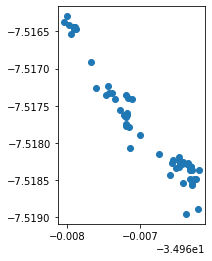

In [10]:
gdf.plot()